In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

In [2]:
tetrahedron_points = [np.array([0., 0., 0.]),
                      np.array([1., 0., 0.]),
                      np.array([np.cos(np.pi/3), np.sin(np.pi/3), 0.]),
                      np.array([0.5, 0.5/np.sqrt(3), np.sqrt(2./3.)])]

sampled_points = np.concatenate([np.random.multivariate_normal(point, np.eye(3)*0.0001, 10)
                                 for point in tetrahedron_points])

init_points = np.concatenate([np.random.multivariate_normal(point[:2], np.eye(2)*0.0001, 10)
                              for point in tetrahedron_points])

In [3]:
N = sampled_points.shape[0]
d = sampled_points.shape[1]

In [4]:
X = tf.placeholder('float')
Xshape = tf.shape(X)

sqX = tf.reduce_sum(X*X, 1)
sqX = tf.reshape(sqX, [-1, 1])
sqDX = sqX - 2*tf.matmul(X, tf.transpose(X)) + tf.transpose(sqX)
sqDXarray = tf.stack([sqDX[i, j] for i in range(N) for j in range(i+1, N)])
DXarray = tf.sqrt(sqDXarray)

Y = tf.Variable(init_points, dtype='float')
sqY = tf.reduce_sum(Y*Y, 1)
sqY = tf.reshape(sqY, [-1, 1])
sqDY = sqY - 2*tf.matmul(Y, tf.transpose(Y)) + tf.transpose(sqY)
sqDYarray = tf.stack([sqDY[i, j] for i in range(N) for j in range(i+1, N)])
DYarray = tf.sqrt(sqDYarray)

In [5]:
Z = tf.reduce_sum(DXarray)*0.5
numerator = tf.reduce_sum(tf.divide(tf.square(DXarray-DYarray), DXarray))*0.5
cost = tf.divide(numerator, Z)

In [6]:
grad_cost = tf.gradients(cost, Y)[0]
lapl_cost = tf.gradients(grad_cost, Y)[0]
Delta = tf.divide(grad_cost, lapl_cost)

In [7]:
update_rule = tf.assign(Y, Y-0.01*grad_cost/lapl_cost)
train = tf.train.AdamOptimizer(0.01).minimize(cost)
init = tf.global_variables_initializer()

In [8]:
sess = tf.Session()

In [9]:
sess.run(init)

In [10]:
nbsteps = 1000
c = sess.run(cost, feed_dict={X: sampled_points})
print "epoch: ", -1, " cost = ", c
for i in range(nbsteps):
    #sess.run(update_rule, feed_dict={X: sampled_points})
    sess.run(train, feed_dict={X: sampled_points})
    c = sess.run(cost, feed_dict={X: sampled_points})
    print "epoch: ", i, " cost = ", c

epoch:  -1  cost =  0.0920705
epoch:  0  cost =  0.0870402
epoch:  1  cost =  0.0828886
epoch:  2  cost =  0.0793428
epoch:  3  cost =  0.0764037
epoch:  4  cost =  0.0739464
epoch:  5  cost =  0.0719505
epoch:  6  cost =  0.0705198
epoch:  7  cost =  0.0695486
epoch:  8  cost =  0.0689278
epoch:  9  cost =  0.0686443
epoch:  10  cost =  0.0686217
epoch:  11  cost =  0.0687656
epoch:  12  cost =  0.0690377
epoch:  13  cost =  0.0693513
epoch:  14  cost =  0.0696001
epoch:  15  cost =  0.0697736
epoch:  16  cost =  0.0698815
epoch:  17  cost =  0.0698813
epoch:  18  cost =  0.0697887
epoch:  19  cost =  0.0696726
epoch:  20  cost =  0.069532
epoch:  21  cost =  0.0693173
epoch:  22  cost =  0.0690676
epoch:  23  cost =  0.0688305
epoch:  24  cost =  0.0686077
epoch:  25  cost =  0.0683875
epoch:  26  cost =  0.0682082
epoch:  27  cost =  0.0680804
epoch:  28  cost =  0.068
epoch:  29  cost =  0.0679745
epoch:  30  cost =  0.0679713
epoch:  31  cost =  0.0679832
epoch:  32  cost =  0.068

In [11]:
calculated_Y = sess.run(Y, feed_dict={X: sampled_points})

In [12]:
sess.close()

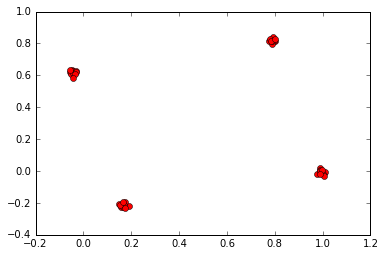

In [13]:
embed1, embed2 = calculated_Y.transpose()
plt.plot(embed1, embed2, 'ro')

In [14]:
calculated_Y

array([[ 0.14683235, -0.20948094],
       [ 0.15872549, -0.22661892],
       [ 0.18912008, -0.21662953],
       [ 0.17513931, -0.19621073],
       [ 0.16374348, -0.2225669 ],
       [ 0.16115342, -0.20829189],
       [ 0.17031579, -0.21114521],
       [ 0.15328573, -0.21544307],
       [ 0.16664596, -0.19738662],
       [ 0.17317258, -0.23436311],
       [ 1.00464702, -0.01045138],
       [ 0.97684622, -0.0194777 ],
       [ 1.00865734, -0.00616108],
       [ 1.00163913, -0.01912533],
       [ 1.00772727, -0.03329153],
       [ 0.98837495,  0.01797078],
       [ 0.98794466,  0.00569973],
       [ 0.99095327,  0.00224924],
       [ 0.99690074,  0.00393694],
       [ 0.98785996, -0.0160472 ],
       [ 0.77657151,  0.81354678],
       [ 0.78486717,  0.82309002],
       [ 0.8032645 ,  0.81622088],
       [ 0.79544014,  0.81489956],
       [ 0.79471076,  0.83763307],
       [ 0.78720582,  0.79636037],
       [ 0.78673559,  0.81671888],
       [ 0.78220034,  0.83112466],
       [ 0.78263438,